# In-Class Quiz Nº 3

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Tiago Silva
## Number: A47199

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q3.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: CIFAR-10 (small version)

In [1]:
import keras.datasets.cifar10 as cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow import keras

(X1, y1), (X2, y2) = cifar10.load_data()
y1 = y1.squeeze()
y2 = y2.squeeze()


2023-05-18 19:28:04.224365: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 19:28:04.251776: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 19:28:04.252317: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 19:28:04.944379: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 .batch(train_batch_size)\# Question 1:
## a) Select for training a subset of 20000 images from the matrix X1. Make sure that there are 2000 examples per class and that this new training data is shuffled. Also make shure that the test set (matrix X2) is ordered per class.
## b) Use generators for training and validation as specified in the cell below. Build a test generator. Make sure that this generator does not shuffle the data. Use this generator to go through the test set and retreive the class of the examples in it. Plot the class of the 10000 examples in the test set.
## c) Build (from scratch) a CNN with an architecture of your choice and with the following restrictions:
### - Use 6 convolutional layers
### - Use 3 pooling layers
##  Build this network, compile and train the network using the  training and validation generators. Make sure to go through the whole training and validation sets in each epoch. Plot the  the losses and the accuracies curves for the training and validation sets during the training process. Train the network for 25 epochs.  Comment the results. 
## d) Use the test generator to obtain the confusion matrix and the total number of erros in the test set.

## 1.a)

In [2]:
X1.shape

(50000, 32, 32, 3)

In [3]:
20000 / 10

2000.0

In [4]:
# numero por classe
np.unique(y1, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [5]:
# ordenar por classes
X1 = X1[np.argsort(y1)]
y1 = y1[np.argsort(y1)]
X2 = X2[np.argsort(y2)]
y2 = y2[np.argsort(y2)]

In [6]:
# selecionar 2000 exemplos por classe
X1_smaller = np.zeros((20000, 32, 32, 3))
y1_smaller = np.zeros(20000)
for i in range(10):
    X1_smaller[i * 2000:(i + 1) * 2000] = X1[y1 == i][:2000]
    y1_smaller[i * 2000:(i + 1) * 2000] = y1[y1 == i][:2000]


In [7]:
# verificar tamanho
X1_smaller.shape

(20000, 32, 32, 3)

In [8]:
# Validar quantos exemplos por classe
np.unique(y1_smaller, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]))

In [9]:
# shuffle X1_smaller e y1_smaller
idx = np.arange(20000)
idx = np.random.permutation(idx)
X1_smaller = X1_smaller[idx]
y1_smaller = y1_smaller[idx]

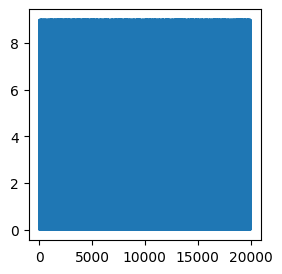

In [10]:
plt.figure(figsize=(3, 3))
plt.plot(y1_smaller)
plt.show()

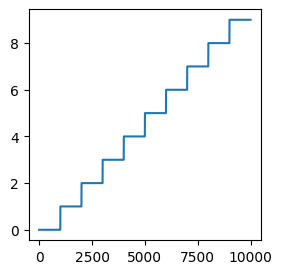

In [11]:
# Validar que y2 está ordenado por classes
plt.figure(figsize=(3, 3))
plt.plot(y2)
plt.show()

## 1.b)

In [12]:
X1_smaller.shape[0] * .75 / 1000

15.0

In [13]:
X1_smaller.shape[0] * .25 / 500

10.0

In [14]:
X2.shape[0] / 500

20.0

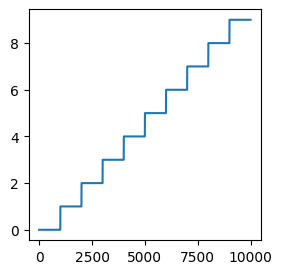

In [15]:
Y1 = keras.utils.to_categorical(y1_smaller)
Y2 = keras.utils.to_categorical(y2)

#matriz X1 tem que ter dimensão 20000x32x32x3
dataGen = ImageDataGenerator(rescale=1. / 255, validation_split=.25)
train_batch_size = 1000
trainGen = dataGen.flow(X1_smaller, Y1, batch_size=train_batch_size, subset='training')
valid_batch_size = 500
validGen = dataGen.flow(X1_smaller, Y1, batch_size=valid_batch_size, subset='validation')

#gerador do teste ...
test_batch_size = 500
dataGen_1 = ImageDataGenerator(rescale=1. / 255)
testGen = dataGen_1.flow(X2, Y2, batch_size=test_batch_size, shuffle=False)
gen_pos = testGen.batch_index
# Validar que o generator de teste não faz shuffle
test_y = list()
for i in range(testGen.n // test_batch_size):
    X, y = testGen.next()
    test_y.extend(np.argmax(y, axis=1))
plt.figure(figsize=(3, 3))
plt.plot(np.arange(testGen.n), test_y)
plt.show()

# validar que demos a volta por todos os exemplos
assert gen_pos == testGen.batch_index

## 1.c)

In [16]:
cifar_cnn = keras.Sequential()
cifar_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cifar_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
cifar_cnn.add(keras.layers.AveragePooling2D((2, 2)))
cifar_cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cifar_cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cifar_cnn.add(keras.layers.AveragePooling2D((2, 2)))
cifar_cnn.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
cifar_cnn.add(keras.layers.Conv2D(128, (1, 1), activation='relu'))
cifar_cnn.add(keras.layers.AveragePooling2D((2, 2)))
cifar_cnn.add(keras.layers.Flatten())
cifar_cnn.add(keras.layers.Dense(128, activation='relu'))
cifar_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
cifar_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 64)         0         
 ePooling2D)                                            

In [18]:
cifar_cnn.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
best_model = keras.callbacks.ModelCheckpoint('best_model_cifar.h5', monitor='val_loss', save_best_only=True)
train = cifar_cnn.fit(
    trainGen, steps_per_epoch=trainGen.n // train_batch_size, epochs=25,
    validation_data=validGen, validation_steps=validGen.n // valid_batch_size,
    callbacks=[early_stop, best_model]
)
cifar_cnn = keras.models.load_model('best_model_cifar.h5')

Epoch 1/25


2023-05-18 19:28:07.519484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - ETA: 0s - loss: 2.2862 - accuracy: 0.1319

2023-05-18 19:28:24.716674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - 18s 1s/step - loss: 2.2862 - accuracy: 0.1319 - val_loss: 2.2301 - val_accuracy: 0.1608
Epoch 2/25
15/15 [==============================] - 17s 1s/step - loss: 2.2096 - accuracy: 0.1951 - val_loss: 2.0983 - val_accuracy: 0.2286
Epoch 3/25
15/15 [==============================] - 17s 1s/step - loss: 2.0475 - accuracy: 0.2521 - val_loss: 1.9514 - val_accuracy: 0.2768
Epoch 4/25
15/15 [==============================] - 18s 1s/step - loss: 1.9202 - accuracy: 0.2914 - val_loss: 1.9215 - val_accuracy: 0.3038
Epoch 5/25
15/15 [==============================] - 17s 1s/step - loss: 1.8415 - accuracy: 0.3271 - val_loss: 1.9837 - val_accuracy: 0.2870
Epoch 6/25
15/15 [==============================] - 18s 1s/step - loss: 1.8050 - accuracy: 0.3417 - val_loss: 1.9529 - val_accuracy: 0.2870
Epoch 7/25
15/15 [==============================] - 16s 1s/step - loss: 1.7572 - accuracy: 0.3599 - val_loss: 1.7356 - val_accuracy: 0.3686
Epoch 8/25
15/15 [=============

## 1.d)

 2/20 [==>...........................] - ETA: 1s

2023-05-18 19:35:17.140058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 2s 88ms/step
[[505  60  36  18  28  15  16  25 200  97]
 [ 25 620  10  15   4   7  12  20  61 226]
 [ 87  21 351  87 124  83 105  71  30  41]
 [ 33  15  64 313  71 229 124  77  20  54]
 [ 35  17 108  71 341  70 162 133  31  32]
 [ 16   9  72 196  60 431  52 112  18  34]
 [  4  15  55 113  80  29 625  28  10  41]
 [ 29  13  25  72  62  90  19 607  17  66]
 [144  79   7  21  12  15  15  17 554 136]
 [ 30 128  15  18   7  13  24  45  85 635]]
Total errors: 5018 of 10000
Accuracy: 0.4982


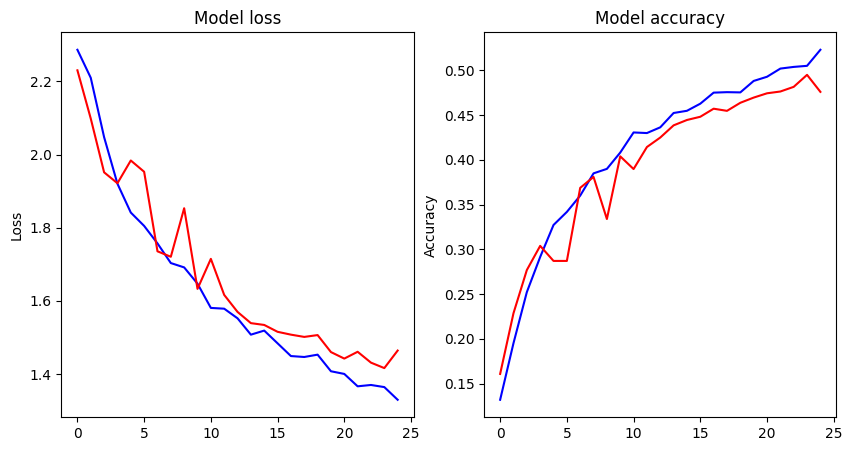

In [26]:
cifar_cnn_y_pred = cifar_cnn.predict(testGen, steps=testGen.n // test_batch_size)
cifar_cnn_y_pred = np.argmax(cifar_cnn_y_pred, axis=1)

cifar_cm = confusion_matrix(y2, cifar_cnn_y_pred)
print(cifar_cm)
print(f'Total errors: {np.sum(cifar_cm) - np.trace(cifar_cm)} of {testGen.n}')
print(f'Accuracy: {np.trace(cifar_cm) / testGen.n}')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(train.history['accuracy'], color='b', label='Training accuracy')
plt.plot(train.history['val_accuracy'], color='r', label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.subplot(1, 2, 1)
plt.plot(train.history['loss'], color='b', label='Training loss')
plt.plot(train.history['val_loss'], color='r', label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.show()


Olhando para as curvas de loss e accuracy do modelo, podemos ver que o modelo não está a fazer overfitting, pois a accuracy e a loss do conjunto de validação não divergem muito do conjunto de treino. E é provavel que com mais epocas de treino o modelo conseguisse uma accuracy maior.

# Question 2
## Consider that we want to use transfer learning to build a CNN to tackle the problem. For the pre-trained CNN use MobileNetV2. Use only one Dense layer for the output of the network.
### a)  Build and compile this network.
### b)  Define new generators (for training, validation and testing) so that they perform the correct pre-process of he data so it can be used by the network.
### c)  Train the network for 25 epochs and show the results. Print the confusion matrix and the total number of errors in the test set. Compare the results with the ones obtained in the previous question and state the possible reasons for the differences in performance.

## 2.a)

In [75]:
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
mobilenet = MobileNetV2(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
mobilenet.trainable = False

cnn_transfer = keras.Sequential()
cnn_transfer.add(mobilenet)
cnn_transfer.add(keras.layers.Flatten())
cnn_transfer.add(keras.layers.Dense(10, activation='softmax'))

In [76]:
cnn_transfer.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_10 (Flatten)        (None, 1280)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               163968    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2,423,242
Trainable params: 165,258
Non-trainable params: 2,257,984
_________________________________________________________________


In [77]:
cnn_transfer.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

## 2.b)

In [78]:
transfer_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=.25)
transfer_data_gen_1 = ImageDataGenerator(preprocessing_function=preprocess_input)
transfer_data_gen_aug = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=.25,
    rotation_range=10,
    width_shift_range=0.1, height_shift_range=0.1,
    horizontal_flip=True, vertical_flip=False, fill_mode='nearest'
)
transfer_train_gen = transfer_data_gen_aug.flow(X1_smaller, Y1, batch_size=train_batch_size, subset='training')
transfer_valid_gen = transfer_data_gen.flow(X1_smaller, Y1, batch_size=valid_batch_size, subset='validation')
transfer_test_gen = transfer_data_gen_1.flow(X2, Y2, batch_size=test_batch_size, shuffle=False)

## 2.c)

In [79]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
best_model = keras.callbacks.ModelCheckpoint('best_model_transfer.h5', monitor='val_loss', save_best_only=True)
transfer_train = cnn_transfer.fit(
    transfer_train_gen, steps_per_epoch=transfer_train_gen.n // train_batch_size, epochs=25,
    validation_data=transfer_valid_gen, validation_steps=transfer_valid_gen.n // valid_batch_size,
    callbacks=[early_stop, best_model]
)
cnn_transfer = keras.models.load_model('best_model_transfer.h5')

Epoch 1/25


2023-05-18 20:03:25.408558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - ETA: 0s - loss: 2.2764 - accuracy: 0.1680

2023-05-18 20:03:35.135045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - 12s 683ms/step - loss: 2.2764 - accuracy: 0.1680 - val_loss: 2.2404 - val_accuracy: 0.2118
Epoch 2/25
15/15 [==============================] - 9s 604ms/step - loss: 2.2084 - accuracy: 0.2332 - val_loss: 2.1722 - val_accuracy: 0.2316
Epoch 3/25
15/15 [==============================] - 9s 614ms/step - loss: 2.1413 - accuracy: 0.2477 - val_loss: 2.1164 - val_accuracy: 0.2556
Epoch 4/25
15/15 [==============================] - 9s 610ms/step - loss: 2.0850 - accuracy: 0.2685 - val_loss: 2.0774 - val_accuracy: 0.2608
Epoch 5/25
15/15 [==============================] - 9s 612ms/step - loss: 2.0415 - accuracy: 0.2795 - val_loss: 2.0507 - val_accuracy: 0.2634
Epoch 6/25
15/15 [==============================] - 9s 596ms/step - loss: 2.0120 - accuracy: 0.2822 - val_loss: 2.0333 - val_accuracy: 0.2642
Epoch 7/25
15/15 [==============================] - 9s 595ms/step - loss: 1.9957 - accuracy: 0.2884 - val_loss: 2.0203 - val_accuracy: 0.2642
Epoch 8/25
15/15

2023-05-18 20:07:16.613803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 3s 120ms/step
[[428  65  47  25  27  22  24  46 122 194]
 [ 45 196   7   7   5  28   6  16  28 662]
 [159  45 138  28  90  54 104  39  44 299]
 [ 49  79  42  64  33  95  79  26  19 514]
 [ 48  27  45  33 364  38 152 101  43 149]
 [ 39  49  34  39  38 112  56  24  12 597]
 [ 44  50  36  27 103  41 424  23  16 236]
 [ 37  35  31  19  68  47  25 199  50 489]
 [ 83  85  18   7  12  15   9  50 172 549]
 [ 28 104   5   7   7  18   6  24  38 763]]
Total errors: 7140 of 10000
Accuracy: 0.286


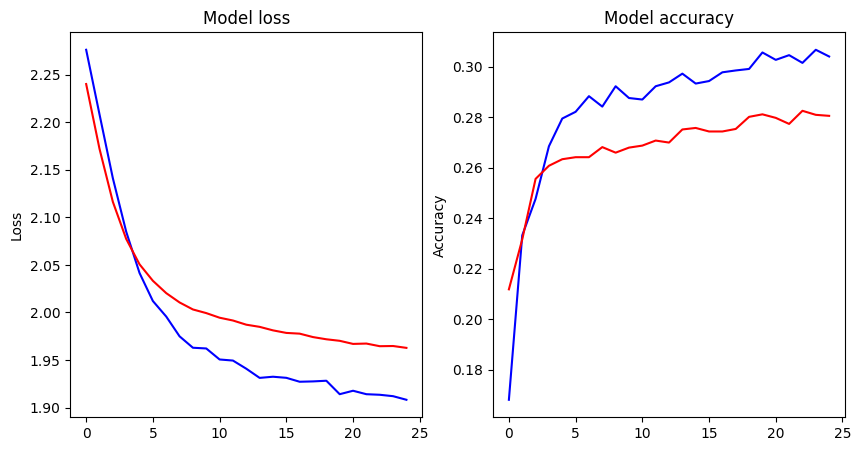

In [80]:
transfer_y_pred = cnn_transfer.predict(transfer_test_gen, steps=transfer_test_gen.n // test_batch_size)
transfer_y_pred = np.argmax(transfer_y_pred, axis=1)

transfer_cm = confusion_matrix(y2, transfer_y_pred)
print(transfer_cm)
print(f'Total errors: {np.sum(transfer_cm) - np.trace(transfer_cm)} of {transfer_test_gen.n}')
print(f'Accuracy: {np.trace(transfer_cm) / transfer_test_gen.n}')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(transfer_train.history['accuracy'], color='b', label='Training accuracy')
plt.plot(transfer_train.history['val_accuracy'], color='r', label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.subplot(1, 2, 1)
plt.plot(transfer_train.history['loss'], color='b', label='Training loss')
plt.plot(transfer_train.history['val_loss'], color='r', label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.show()

Olhando para as curvas de loss e accuracy do modelo, podemos ver que o modelo começa a fazer overfitting, pois a accuracy e a loss do conjunto de validação começam a divergir do conjunto de treino, ao contrário do modelo anterior. É provavel que ainda seja possivel aumentar a accuracy do modelo com mais epocas de treino, mas o modelo anterior parece ser mais eficaz.

Apesar de esperar que o modelo com transfer learning fosse mais eficaz, o modelo anterior parece ser mais eficaz. Isto pode ser devido ao modelo com transfer learning ter sido treinado com imagens de 224x224, enquanto o modelo anterior foi treinado com imagens de 32x32. Isto pode ter levado a que o modelo com transfer learning não tenha conseguido aprender tão bem os features das imagens, pois as imagens de 32x32 são muito mais pequenas que as de 224x224.